In [1]:
from teachers import *
from student import *
from aggregator import *
from analysis import *
from data_loader import load_student_data
import matplotlib.pyplot as plt
import warnings

colors = plt.rcParams["axes.prop_cycle"].by_key()['color']
color_index = 0
plt.rcParams["figure.figsize"] = [20,5]

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
dataset = "acsemployment"
nb_teachers = 30

# prepare datasets !
subsets, student = get(dataset, nb_teachers)

In [3]:
# train teachers
teachers = train_teachers(subsets, nb_teachers)
init_teachers(teachers)

/home/sabaly/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Teachers: 100%


In [4]:
accuracies, eod, spd = stats(nb_teachers, teachers, subsets)
set_metrics(eod)

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8276 - loss: 0.3920
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8179 - loss: 0.3863
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8131 - loss: 0.3832
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.4209
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7872 - loss: 0.4290
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8199 - loss: 0.4054
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8186 - loss: 0.3911
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8195 - loss: 0.3876
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
438/438 ━━━━━━━━━━━━━━━━━━━

In [5]:
# loading student dataset
if student == None:
    # fake student train data
    x_test = None
    y_test = None
    for subset in subsets:
        if x_test is None:
            x_test = subset[1]
            y_test = subset[3]
        else:
            x_test = np.concatenate((x_test, subset[1]))
            y_test = np.concatenate((y_test, subset[3]))
    train_size = int(0.8*len(x_test))
    x_train = x_test[:train_size]
    x_test = x_test[train_size:]
    y_test = y_test[train_size:]
else:
    # load student dataset
    (x_train, x_test, y_train, y_test, s_train, s_test) = load_student_data(student)

In [6]:
# define aggregation methode
aggregator = gaussian_noisy_vote
student_trained = False

In [94]:
aggregator = update_aggregator(aggregator)

1. Plurality 	 2. LNMax	 3. GNMax 	 4. Only Fair
 (0 to exit)>>>2


In [7]:
# train student model
st_model = train_student(x_train, aggregator)
y_pred = eval_student_model(st_model, x_test, y_test, aggregator)
st_stats = fairness(st_model, x_test, y_pred, s_test)

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
168/168 ━━━━━━━━

/home/sabaly/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7060 - loss: 0.5517
Epoch 2/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7480 - loss: 0.4726
Epoch 3/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7497 - loss: 0.4536
Epoch 4/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7521 - loss: 0.4511
Epoch 5/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7669 - loss: 0.4462
Epoch 6/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7575 - loss: 0.4393
Epoch 7/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7560 - loss: 0.4476
Epoch 8/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7597 - loss: 0.4433
Epoch 9/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7473 - loss: 0.4521
Epoch 10/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7752 - loss: 0.4280
Epoch 11/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7637 - loss: 0.4403
Epoch 12/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy

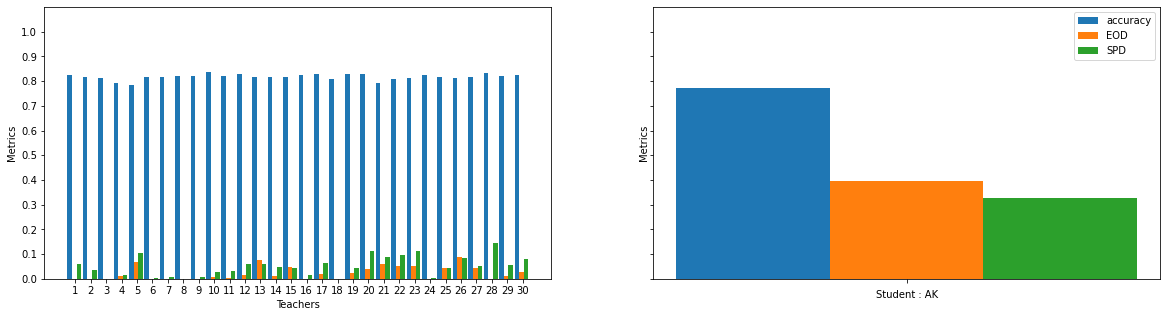

In [9]:
fig, (tchr_ax, st_ax)= plt.subplots(1, 2, sharey=True)
b_width = 0.3
x1 = range(len(accuracies))
x2 = [x + b_width for x in x1]
x3 = [x + b_width for x in x2]
# teachers hist 
tchr_ax.bar(x1, accuracies, width = b_width, color=colors[0], label="accuracy")
tchr_ax.bar(x2, eod, width = b_width, color=[colors[1] for _ in eod],label="EOD")
tchr_ax.bar(x3, spd, width = b_width, color=[colors[2] for _ in spd], label="SPD")
tchr_ax.set_xticks([x + b_width/4 for x in x2], [t+1 for t in range(nb_teachers)])
tchr_ax.set_yticks(np.arange(0, 1.1, step=0.1))
tchr_ax.set_ylim([0,1.1])
tchr_ax.set_xlabel("Teachers")
tchr_ax.set_ylabel("Metrics")
st_ax.bar([1], [st_stats["ACC"]], width=b_width, color=colors[0], label="accuracy")
st_ax.bar([1+b_width], [st_stats["EOD"]], width=b_width, color=colors[1], label="EOD")
st_ax.bar([1+2*b_width], [st_stats["SPD"]], width=b_width, color=colors[2], label="SPD")
st_ax.set_xticks([1+b_width], [""])
st_ax.set_yticks(np.arange(0, 1.1, step=0.1))
st_ax.set_ylim([0,1.1])
st_ax.set_xlabel(f"Student : {student}")
st_ax.set_ylabel("Metrics")
plt.legend()
plt.show()